# 二分类 Binary Classification
Binary classification - When your output y is 0 or 1

e.g.:输入一张图片，输出这张图面是不是猫。

我们输入一组数据，通常是一个向量或矩阵，输出0或1的结果。

## 符号规定
* x 代表一个$n_x$维数据，作为数据输入. 维度为$(n_x,1)$
* y 代表输出结果，取值为(0,1)
* $\left(x^{(i)}, y^{(i)}\right)$ 代表第i组数据，默认是训练数据
* $X=\left[x^{(1)}, x^{(2)}, \ldots, x^{(m)}\right]$代表所有训练数据集的输入值，每条训练数据作为列向量输入
* $Y=\left[y^{(1)}, y^{(2)}, \ldots, y^{(m)}\right]$，代表所有训练数据集的输出集。

# Logistic Regression 逻辑回归模型
对于Binary Classification问题，我们输入一个向量$X$，获得一个输出$\hat{y}$作为对实际值$y$的估计。或者说$\hat{y}$作为$y$等于1的一种可能性。即$\hat{y} = P(y=1|x)$

一种方案：$\hat{y}=\sigma (w^{T} x+b)$

$$\sigma(z)=\frac{1}{1+e^{-z}}$$
* 参数：$w \in \mathbb{R}^{n x}$，$b \in \mathbb{R}$
* $\sigma$为sigmoid函数
* 为了保证结果可归一化，我们将线性映射的结果作为sigmoid函数的输入
* 有意思的是，sigmoid函数就是物理里面的Ferimi-Dirac分布函数
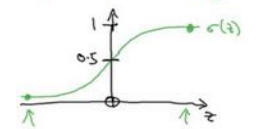

在进行Logistic Regression 时，就是让机器去学习参数$w$和$b$,使$\hat{y}$成为对y=1的良好估计.

* 我们选择将w和b分开，b代表一种偏置。不采用将w和b合并的符号规则.

# Logistic Regression Cost Function 代价函数
**代价函数来描述模型的好坏，从而训练参数w和b**

训练集的预测值为$\hat{y}$

$$
\hat{y}^{(i)}=\sigma\left(w^{T} x^{(i)}+b\right)
$$
where $\sigma(z)=\frac{1}{1+e^{-z}}$

Given $\left\{\left(x^{(1)}, y^{(1)}\right), \ldots,\left(x^{(m)}, y^{(m)}\right)\right\}$, want $\hat{y}^{(i)} \approx y^{(i)}$

给与一个容量为m的训练集，在训练集上找到参数$w$和$b$.上标(i)代表第i组训练样本。



## Loss Function 损失函数 $L(\hat{y}, y)$
** 通过损失函数来衡量预测输出值与实际值有多接近**

* 平方差差函数的优化目标不是凸函数，存在多个局部极值，梯度下降法很可能找不到全局最优值
* 在Logistic Regression 中我们定义损失函数$L(\hat{y}, y)=-(y \log (\hat{y})+(1-y) \log (1-\hat{y}))$
* 这个函数可以很好地描述预测与实际的偏差.可以看出总是能够得到一个凸的优化函数，当$\hat{y} = y$时为优化函数的极小值。
* 我们只需要让优化函数即损失函数尽可能小，即可得到最优化的参数。

**损失函数是在单个训练样本中定义的，衡量算法在单个训练样本中的表现如何**

**代价函数：算法在全部训练样本上的表现**

<ipython-input-12-bbc380bb5d70>:4: RuntimeWarning: divide by zero encountered in log10
  res = -(y*np.log10(yh)+(1-y)*np.log10(1-yh))


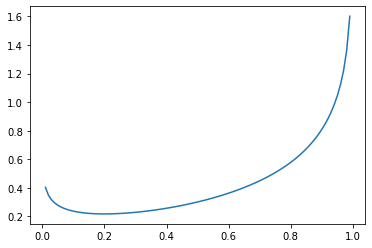

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def L(y,yh):
    res = -(y*np.log10(yh)+(1-y)*np.log10(1-yh))
    return res
yh = np.linspace(0,1,101)
y = 0.2
plt.plot(yh,L(y,yh))


## 代价函数 Cost Function $J(w, b)$
算法的代价函数是对𝑚个样本的损失函数求和然后除以𝑚:
$$
J(w, b)=\frac{1}{m} \sum_{i=1}^{m} L\left(\hat{y}^{(i)}, y^{(i)}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(-y^{(i)} \log \hat{y}^{(i)}-\left(1-y^{(i)}\right) \log \left(1-\hat{y}^{(i)}\right)\right)
$$
* 损失函数只适用于单个训练样本，衡量算法在单个训练样本中的表现
* 代价函数衡量算法在全部训练样本上的表现
* 训练Logistic Regression模型的时候，我们需要找到合适的w和b来使代价函数J的总代价降到最低

# 梯度下降法
在测试集上，通过最小化代价函数$J(w, b)$来训练参数$w$和$b$
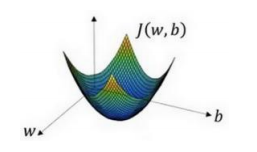
在参数空间中寻求极值.代价函数在参数空间中应该是凸函数(convex function)
1. 初始化参数w和b
2. 朝最陡的下坡方向走一步，反复迭代
3. 直到走到全局最优或者接近全局最优

$$
w:=w-a \frac{d J(w)}{d w}
$$

$\alpha$表示学习率，用来控制补偿；:=代表更新参数

对于多元参数空间，采用求梯度的方法确定前进方向。

# 计算图
神经网络的计算，都是按照前向或反向传播过程组织的。首先我们计算出
一个新的网络的输出（前向过程），紧接着进行一个反向传输操作。后者我们用来计算出对
应的梯度或导数。计算图解释了为什么我们用这种方式组织这些计算过程。

# 逻辑回归中的梯度下降 Gradient Descent
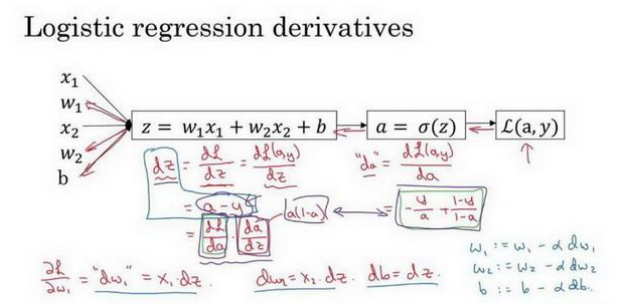

# m个训练样本的梯度下降法
我们初始化𝐽 = 0, 𝑑𝑤1 = 0, 𝑑𝑤2 = 0, 𝑑𝑏 = 0

先正向传播求代价函数，再反向传播求梯度

J=0;dw1=0;dw2=0;db=0;

for i = 1 to m

 z(i) = wx(i)+b;
 
 a(i) = sigmoid(z(i));
 
 J += -[y(i)log(a(i))+(1-y(i)）log(1-a(i));
 
 dz(i) = a(i)-y(i);
 
 dw1 += x1(i)dz(i);
 
 dw2 += x2(i)dz(i);
 
 db += dz(i);
 
J/= m;

dw1/= m;

dw2/= m;

db/= m;

w=w-alpha*dw

b=b-alpha*db


# 向量化 Vectorization
for循环会使程序效率变低，使用向量化可以避免for循环。

In [8]:
import numpy as np
a = np.array([1,2,3,4])
print (a)
import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)
tic = time.time()
c = np.dot(a,b)
toc = time.time()
print("Vectorized Version:"+str(1000*(toc-tic))+"ms")

c = 0
tic = time.time()
for i in range(1000000):
    c += a[i]*b[i]
toc = time.time()
print("For loop version:"+str((toc-tic)*1000)+"ms")


[1 2 3 4]
Vectorized Version:0.9944438934326172ms
For loop version:299.5030879974365ms


**向量化大约可以比for loop快300倍**

CPU 和 GPU都有并行化的指令，他们有时候会叫做 SIMD 指令，这个代表了一个单独指令多维数据，这个的基础意义是，如果你使用了 built-in 函数,像 np.function 或者并不要求你实现循环的函数，它可以让 python 的充分利用并行化计算。

避免使用for 循环，同时使用numpy内置函数.

# 向量化逻辑回归 Vectorizing Logistic Regression

## 向前传播
* 定义矩阵$X$作为训练集输入，$n_x$行$m$列的矩阵，将每一条训练信息作为列向量排列

𝑍 = 𝑛𝑝. 𝑑𝑜𝑡(𝑤. 𝑇,𝑋) + b
* Python的广播broadcast机制
* 𝐴 = [𝑎(1)𝑎(2). . . 𝑎(𝑚)] = 𝜎(𝑍)

这样我们同一时间内完成一个所有 𝑚 个训练样本的前向传播向量化计算。
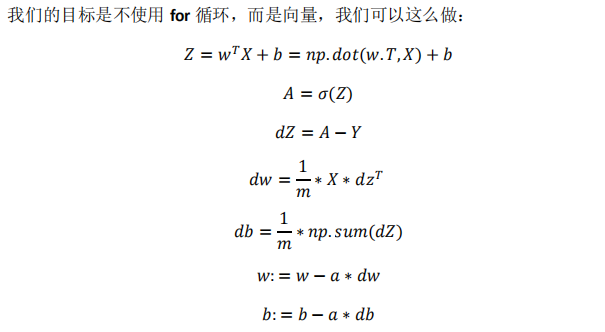

# Python的广播Broadcast机制
如果两个数组的后缘维度的轴长度相符或其中一方的轴长度为 1，则认为它们是广播兼
容的。广播会在缺失维度和轴长度为 1 的维度上进行。

补充一下sum函数的一个tip： A.sum（axis = 0）

axis代表在那个方向上求和压缩维度。0代表在行(垂直方向)上求和压缩维度。

In [15]:

a = np.array([[1,2],[3,4]])
print(a)
print(np.sum(a,axis=0))
print(np.sum(a,axis=1))

[[1 2]
 [3 4]]
[4 6]
[3 7]


# Numpy 中关于向量的说明
* 注意区分秩为1的向量和shape为1的向量

下面的eg给出的是秩为1的向量。这种向量会出现奇怪的对shape的运算兼容

In [18]:
a = np.random.randn(5)
print(a)
print(np.shape(a))
print(a.T)
print(np.dot(a,a.T))

[-0.97603001 -0.11312513  0.27946375 -0.54904358 -0.83292079]
(5,)
[-0.97603001 -0.11312513  0.27946375 -0.54904358 -0.83292079]
2.038737755471654


* 我们在写神经网络的时候最好使用shape明确的向量

In [23]:
a = np.random.randn(5).reshape(5,1)
print(a)
print(a.T)
print(np.dot(a,a.T))

[[ 0.46799827]
 [-0.73616441]
 [-0.05652126]
 [-0.24602294]
 [-0.49668055]]
[[ 0.46799827 -0.73616441 -0.05652126 -0.24602294 -0.49668055]]
[[ 0.21902238 -0.34452367 -0.02645185 -0.11513831 -0.23244564]
 [-0.34452367  0.54193804  0.04160894  0.18111333  0.36563854]
 [-0.02645185  0.04160894  0.00319465  0.01390553  0.02807301]
 [-0.11513831  0.18111333  0.01390553  0.06052729  0.12219481]
 [-0.23244564  0.36563854  0.02807301  0.12219481  0.24669157]]


使用reshape将数组的shape明确下来，可以避免一些很难找到的bug，避免shape的mismatch导致的问题。
